In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title đã download rồi không chạy!

!mkdir -p /content/drive/MyDrive/Colab Notebooks/data mining/vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar /content/drive/MyDrive/Colab Notebooks/data mining/vncorenlp/ 
!mv vi-vocab /content/drive/MyDrive/Colab Notebooks/data mining/vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr /content/drive/MyDrive/Colab Notebooks/data mining/vncorenlp/models/wordsegmenter/

!wget https://public.vinai.io/PhoBERT_base_fairseq.tar.gz
!tar -xzvf PhoBERT_base_fairseq.tar.gz
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

!wget https://public.vinai.io/PhoBERT_large_fairseq.tar.gz
!wget https://public.vinai.io/PhoBERT_large_transformers.tar.gz

!tar -xzvf PhoBERT_large_transformers.tar.gz
!tar -xzvf PhoBERT_large_fairseq.tar.gz

--2021-12-02 13:01:26--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M   139MB/s    in 0.2s    

2021-12-02 13:01:27 (139 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2021-12-02 13:01:27--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting respon

In [ ]:
#path 
data = "/content/drive/MyDrive/Colab Notebooks/data mining/topic_detection_train.v1.0.txt"
savefile = "/content/drive/MyDrive/Colab Notebooks/data mining/topic_detection_train"
stopwordsfile = "/content/drive/MyDrive/Colab Notebooks/data mining/stopwords.txt"

cleandf = "/content/drive/MyDrive/Colab Notebooks/data mining/"

config_path = "/content/drive/MyDrive/Colab Notebooks/data mining/configs/PhoBert_258.json"
PHOBERT_DIR = "/content/drive/MyDrive/Colab Notebooks/data mining/PhoBERT_base_transformers"
PHOBERT_fairseg_DIR = "/content/drive/MyDrive/Colab Notebooks/data mining/PhoBERT_base_fairseq/"

#**Import**

In [ ]:
!pip install fastBPE
!pip install fairseq
!pip install vncorenlp
!pip install transformers

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483110 sha256=44bccfc4fb2d3f81c6cd3d6ab5bc616233fd8978ca3b51c9f61bebad7d8cec46
  Stored in directory: /root/.cache/pip/wheels/bd/d4/0e/0d317a65f77d3f8049fedd8a2ee0519164cf3e6bd77ef886f1
Successfully built fastBPE
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 90 kB 8.9 MB/s 
     |████████████████████████████████| 145 kB 40.1 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 
     |████████████████████████████████| 112 kB 44.7 MB/s 
     |████████████████████████████████| 596 kB 51.3 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=06300053b69f44da50268f70b10af7d3a31f440192c228e272d5392d9e99678f
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: PyYAM

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=327aac8d7af409f670e8e8cebc7e0402609c93327edebe4f2a01d8d4d3c04fdc
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp
     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 35.5 MB/s 
     |████████████████████████████████| 59 kB 4.4 MB/s 
     |████████████████████████████████| 3.3 MB 23.1 MB/s 


In [ ]:
import pandas as pd
import tqdm
import random
import numpy as np

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

from transformers import BertForSequenceClassification, AdamW, BertConfig, BertPreTrainedModel
from transformers import get_linear_schedule_with_warmup


In [ ]:
import tensorflow as tf
from vncorenlp import VnCoreNLP

# **load data**

In [ ]:
df = pd.read_excel(cleandf + "clear_text.xlsx")
df_test = pd.read_excel(cleandf + "clear_testtext.xlsx")

#**Feature engineering**

In [ ]:
import argparse
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary

max_seq_len = 158 # tokens => chuẩn hóa độ dài các câu cùng một độ dài

##Load phoBERT BPE encoder

In [ ]:
# Load BPE encoder
PHOBERT_DIR = PHOBERT_fairseg_DIR
parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default=PHOBERT_DIR + 'bpe.codes',
    required=False,
    type=str,  
    help='path to fastBPE BPE'
)
args = parser.parse_args(args=[])
bpe = fastBPE(args)

In [ ]:
def make_padded_texts(texts, max_length):
    vocab = Dictionary()
    vocab.add_from_file(PHOBERT_DIR + 'dict.txt')
    encoded_texts = []
    for text in texts:
        # Encode the line using fast BPE & Add prefix <s> and suffix </s> 
        subwords = '<s> ' + bpe.encode(text) + ' </s>'
        subwords = bpe.encode(text)
        # Map subword tokens to corresponding indices in the dictionary
        input_ids = vocab.encode_line(
            subwords,
            append_eos=False,
            add_if_not_exist=False
        ).long().tolist()
        encoded_texts.append(input_ids)
        
    # Pad texts to the `max_length`
    padded_texts = pad_sequences(
        encoded_texts,
        maxlen=max_length,
        dtype="long",
        padding='post',
        truncating='post'
    )
    print(f'padded_texts shape: {padded_texts.shape}')
    return padded_texts

##Set max sequence length

###train data

In [ ]:
X = make_padded_texts(df.text, max_seq_len)
X_test = make_padded_texts(df_test.text, max_seq_len)

padded_texts shape: (31538, 128)
padded_texts shape: (10004, 128)


In [ ]:
X[0]

array([   63,  1627,  3066,   388,  9105,   920, 30420,   336,     7,
        6798,    38,    30,  1581,  2387,  1947,  3201,  2189,    11,
         328,   221,     7,   119,   113,    18,  3252,   902,   121,
        8198, 12821,  1344,  6633,    34,  3948,   591,  1671,   699,
         103,    67,   198,    15,   835,   316,     6,  1413,  3804,
         499,    34,  1387,  9009,   902,    38,    45, 40853,   223,
           9,   531, 21987,   189,    97,    39,   462,  8198,  3010,
        5599,    13,    30, 52912,  9763,   205,   531,   131,     8,
          16, 28807,  2167,    11, 49206,  4557,   122,    13,    39,
         700,    14,    11,  1334,     8,    16,    12,    21,   214,
         258,    67,  2288, 10631,  3705, 16184,   560,   234,    48,
          26,    57,   388,  9105,    30,  1403,   214,   142,    33,
        1153,   130,   142,   902,    32,    62,  1289, 12442,  2063,
        5408,  9278,  7873, 22899, 60244,     0,     0,     0,     0,
           0,     0]

In [ ]:
Y = torch.tensor(df.label.values)
Y.shape 

torch.Size([31538])

In [ ]:
attention_masks = [[float(i>0) for i in ii] for ii in X]
attention_masks_test = [[float(i>0) for i in ii] for ii in X_test]

#**Data Loader**

In [ ]:
random_seed = 42
batch_size = 16

##split data set

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, random_state=random_seed, test_size=0.2)
Mask_train, Mask_valid, _, _ = train_test_split(attention_masks, X, random_state=random_seed, test_size=0.2)

##Make data iterable

In [ ]:
#for training
X_train = torch.tensor(X_train)
X_valid = torch.tensor(X_valid)
Y_train = torch.tensor(Y_train)
Y_valid = torch.tensor(Y_valid)
Mask_train = torch.tensor(Mask_train) 
Mask_valid = torch.tensor(Mask_valid)

#for testing without label
X = torch.tensor(X)
Y = torch.tensor(Y)
mask = torch.tensor(attention_masks)
X_test = torch.tensor(X_test)
mask_test = torch.tensor(attention_masks_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


##For keras + phobert

In [ ]:
tfdata_train = tf.data.Dataset.from_tensor_slices(((X_train, Mask_train), Y_train))
tfdata_valid = tf.data.Dataset.from_tensor_slices(((X_valid, Mask_valid), Y_valid))
tfdata_train = tfdata_train.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
tfdata_valid = tfdata_valid.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
tfds_fulltrain = tf.data.Dataset.from_tensor_slices(((X, mask), Y)).shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
tfds_fulltest  = tf.data.Dataset.from_tensor_slices(((X_test, mask_test))).shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#**Keras**

In [ ]:
epochs = 8
namemodel = "phobert128_test"

##keras + phobert

In [ ]:
from transformers import TFBertForSequenceClassification,  BertConfig, TFAutoModel
import os
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, TensorBoard


savemodel_path =  os.path.join("/content/drive/MyDrive/Colab Notebooks/data mining/save",  namemodel)
checkpoint_prefix = os.path.join(savemodel_path, "ckpt", "weights-{epoch:02d}-{val_loss:.2f}.hdf5")
log_path = os.path.join(savemodel_path, 'log')
if not os.path.exists(checkpoint_prefix):
        os.makedirs(savemodel_path)
        os.makedirs(checkpoint_prefix)
        os.makedirs(log_path)


config = BertConfig.from_pretrained(config_path)
# model = TFBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/Colab Notebooks/data mining/PhoBERT_base_transformers/tf_model.h5", 
#                                                         config=config,from_pt=False)
model = TFBertForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=23)

# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 1e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08, clipvalue=1.0)

# we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
callbacks = [ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True),
            TensorBoard(log_dir=log_path)]

metrics = [tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFBertForSequenceClassification: ['lm_head', 'roberta']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['bert', 'classifier']
You should probably TRAIN this model 

Model: "tf_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  134998272 
                                                                 
 dropout_113 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  17687     
                                                                 
Total params: 135,015,959
Trainable params: 135,015,959
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#normal train
# bert_history = model.fit(tfds_fulltrain, epochs=epochs, callbacks=callbacks, initial_epoch=0)
bert_history = model.fit(tfds_fulltrain, epochs=epochs, initial_epoch=0)

Epoch 1/8
1972/1972 [==============================] - 1612s 807ms/step - loss: 1.1607 - accuracy: 0.6518
Epoch 2/8
1972/1972 [==============================] - 1593s 808ms/step - loss: 0.4007 - accuracy: 0.8499
Epoch 3/8
1972/1972 [==============================] - 1594s 808ms/step - loss: 0.2644 - accuracy: 0.8834
Epoch 4/8
1972/1972 [==============================] - 1594s 809ms/step - loss: 0.2065 - accuracy: 0.8978
Epoch 5/8
1972/1972 [==============================] - 1595s 809ms/step - loss: 0.1811 - accuracy: 0.9018
Epoch 6/8
1972/1972 [==============================] - 1595s 809ms/step - loss: 0.1630 - accuracy: 0.9112
Epoch 7/8
1972/1972 [==============================] - 1596s 809ms/step - loss: 0.1538 - accuracy: 0.9138
Epoch 8/8
1972/1972 [==============================] - 1584s 803ms/step - loss: 0.1450 - accuracy: 0.9173


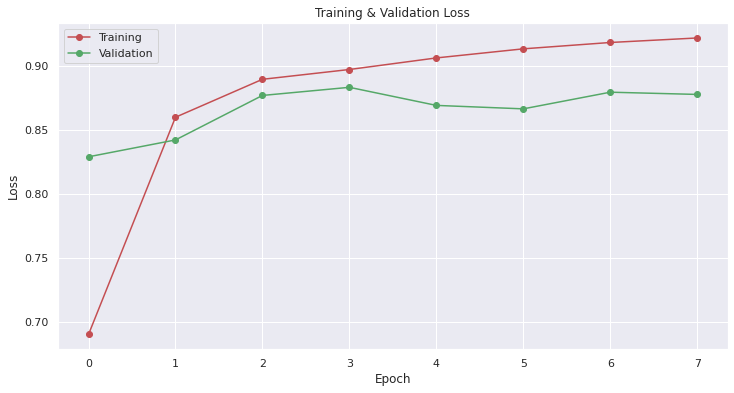

In [ ]:
#@title plot
import seaborn as sns
import matplotlib.pyplot as plt

df_stats = pd.DataFrame(data=bert_history.history)
# Use the 'epoch' as the row index.
# df_stats = df_stats.set_index('epoch')

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
# sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
# Plot the learning curve.
plt.plot(df_stats['accuracy'], 'r-o', label="Training")
plt.plot(df_stats['val_accuracy'], 'g-o', label="Validation")
# Label the plot.
plt.title("Training & Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()
# plt.xticks([i + 1 for i in range(epochs)])

plt.show()

##validation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
model_save_path='/content/drive/MyDrive/Colab Notebooks/data mining/save/phobert128/ckpt/weights-08-0.27.hdf5'
model.load_weights(model_save_path)

In [ ]:
preds = model.predict([np.array(X_valid), np.array(Mask_valid)], batch_size=16)

In [ ]:
pred_labels = np.argmax(preds.logits, axis=1)
true_labels = np.array(Y_valid)
import sklearn
target_name = sklearn.preprocessing.LabelEncoder().fit(df.true_label).inverse_transform(range(23))

In [ ]:
acc = accuracy_score(true_labels,pred_labels)
print('accuracy',acc)
print('Classification Report')
print(classification_report(true_labels, pred_labels, target_names=target_name ))

accuracy 0.8663601775523145
Classification Report
                                       precision    recall  f1-score   support

                   __label__Chinh_tri       0.98      0.98      0.98       294
         __label__Con_nguoi_va_xa_hoi       0.94      0.99      0.96       160
               __label__Cong_nghe_moi       1.00      0.71      0.83        14
            __label__Do_an_va_do_uong       1.00      0.99      0.99       961
                     __label__Du_lich       0.96      0.96      0.96       367
                    __label__Giai_tri       0.70      1.00      0.82        87
                    __label__Giao_duc       0.96      0.88      0.92       256
                  __label__Giao_thong       0.94      0.89      0.92        37
                    __label__Khoa_hoc       0.74      0.98      0.85        59
   __label__Kinh_doanh_va_Cong_nghiep       0.81      0.37      0.51       934
         __label__Lam_dep_va_the_hinh       1.00      0.94      0.97       111
 

#**Testing**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
model_save_path='/content/drive/MyDrive/Colab Notebooks/data mining/save/phobert128/ckpt/weights-08-0.27.hdf5'
model.load_weights(model_save_path)

In [ ]:
preds = model.predict(tfds_fulltest, batch_size=16)

In [ ]:
pred_labels = np.argmax(preds.logits, axis=1)

import sklearn
true_labels = sklearn.preprocessing.LabelEncoder().fit(df.true_label).inverse_transform(pred_labels)

In [ ]:
with open("/content/drive/MyDrive/Colab Notebooks/data mining/predicttion/pred_phobert_158.txt", "wt") as f:
    for i in true_labels:
        f.write(i+"\n")

In [ ]:
true_labels

array(['__label__May_tinh_va_thiet_bi_dien_tu', '__label__Du_lich',
       '__label__Tai_chinh', ..., '__label__Lam_dep_va_the_hinh',
       '__label__Do_an_va_do_uong', '__label__Do_an_va_do_uong'],
      dtype=object)